<a href="https://colab.research.google.com/github/gboyeg/Spaceship-Titanic/blob/main/spaceship_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor # for building random forest models
from sklearn.preprocessing import StandardScaler # for data preprocessing
import matplotlib.pyplot as plt # for data visualization
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install astropy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.utils.data import download_file

In [10]:
df = pd.read_csv('/content/drive/MyDrive/spaceship data1/sample_submission.csv')

In [11]:
df.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [8]:
from google.colab import output
output.enable_custom_widget_manager()

In [12]:
# Load the data
train_data = pd.read_csv("/content/drive/MyDrive/spaceship data1/train.csv") # load training data
test_data = pd.read_csv("/content/drive/MyDrive/spaceship data1/test.csv") # load test data

In [ ]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [13]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [14]:
df.info

<bound method DataFrame.info of      PassengerId  Transported
0        0013_01        False
1        0018_01        False
2        0019_01        False
3        0021_01        False
4        0023_01        False
...          ...          ...
4272     9266_02        False
4273     9269_01        False
4274     9271_01        False
4275     9273_01        False
4276     9277_01        False

[4277 rows x 2 columns]>

In [15]:
df.describe()

,PassengerId,Transported
count,4277,4277
unique,4277,1
top,0013_01,False
freq,1,4277


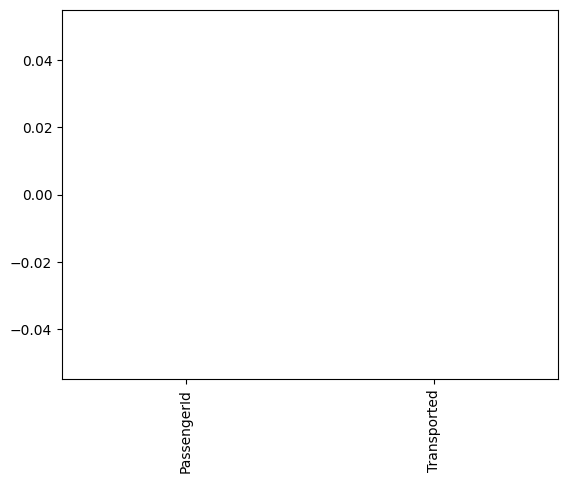

In [18]:
df.isnull().sum().plot.bar()
plt.show()

In [20]:
train_data.shape , train_data.dtypes

((8693, 14),
 PassengerId      object
 HomePlanet       object
 CryoSleep        object
 Cabin            object
 Destination      object
 Age             float64
 VIP              object
 RoomService     float64
 FoodCourt       float64
 ShoppingMall    float64
 Spa             float64
 VRDeck          float64
 Name             object
 Transported        bool
 dtype: object)

Lets explore the data and ask questions to better understand the data.

The dataset has the following features:


PassengerId:Unique Id of a passenger
HomePlanet: The home planet of the passenger
CryoSleep: This is a kind of animation in which a passenger will be suspended during the whole voyage and remain confined to their cabin.
Cabin: Cabin number
Destination: 
Age: Age in years
VIP: Indicates whether the person has opted for VIP service or not.
RoomService: 
FoodCourt: 
ShoppingMall:Commodities on which passengers of the spaceship can choose to spend.
Spa: 
VRDeck:
Name: 
Transported:This is the target column. This indicates whether the passenger has been transported to another dimension or not.


<Axes: xlabel='Age', ylabel='Count'>

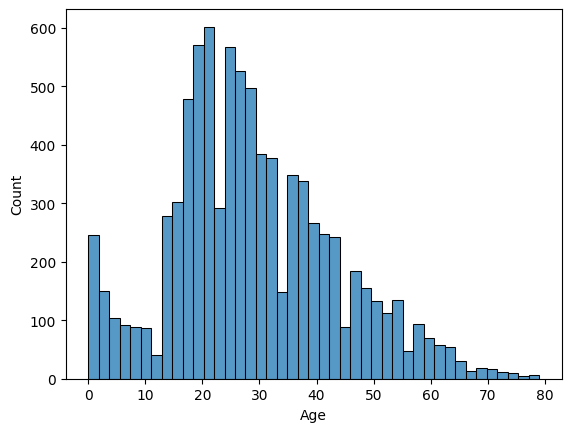

In [25]:
sns.histplot(data=train_data,x="Age")

<Axes: xlabel='HomePlanet', ylabel='count'>

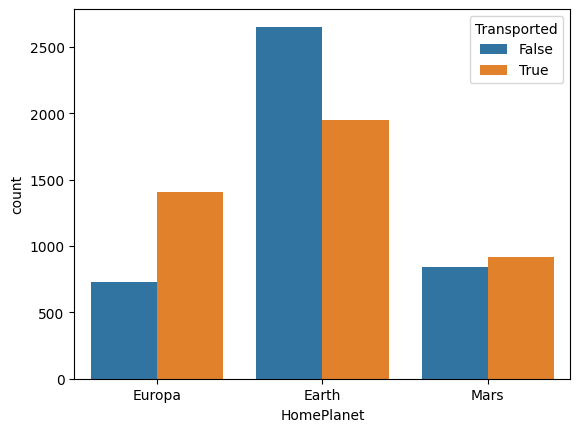

In [26]:
sns.countplot(data=train_data,x="HomePlanet",hue="Transported")